Sample Means:  [np.float64(1.6662334228458762), np.float64(1.811497213772074), np.float64(2.1065896286924466), np.float64(1.629235216537882), np.float64(1.9138843688608183), np.float64(1.6261760488034085), np.float64(1.7884194347441178), np.float64(2.2467541349956544), np.float64(1.9983566766332657), np.float64(1.8488116079200583), np.float64(1.937872225428935), np.float64(2.2113893301418632), np.float64(2.09026953472542), np.float64(1.5713394146904371), np.float64(1.7237689073493971), np.float64(2.217903563528111), np.float64(2.4273456551321977), np.float64(2.0030884598014613), np.float64(1.922406916426686), np.float64(2.23226791901976), np.float64(1.8338509222445822), np.float64(1.9955603802805433), np.float64(1.7501603341059693), np.float64(1.7157531351761783), np.float64(1.5927589071148567), np.float64(1.8010199178602813), np.float64(2.182826641426277), np.float64(1.7648741954402132), np.float64(2.0910404703253125), np.float64(1.862455153926889), np.float64(2.3288846587484), np.flo

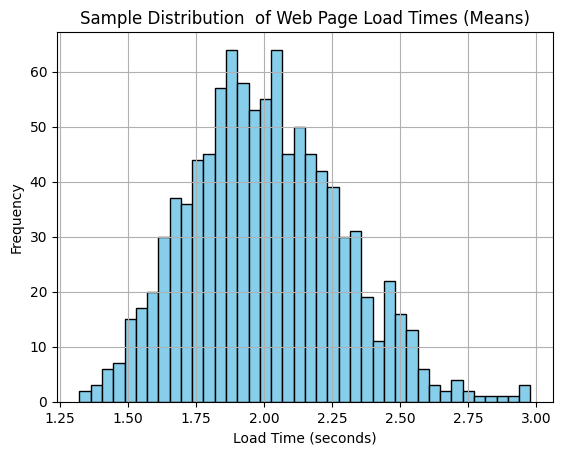

In [19]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)

population = np.random.exponential(scale=2.0, size=100000)

# Parameters 
sample_size = 50
num_samples = 1000
samples_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    samples_means.append(np.mean(sample))
print('Sample Means: ',samples_means)
print(f'Mean of population: {np.mean(population)}')
print(f'Mean of sample means: {np.mean(samples_means)}')
    
# Plot the sampples of means
plt.hist(samples_means, bins=40, color='skyblue', edgecolor='black')
plt.title('Sample Distribution  of Web Page Load Times (Means)')
plt.xlabel('Load Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# From the above diagram we can see that the distribution of sample means approximates a normal distribution, demonstrating the Central Limit Theorem.
# And this holds true for large sample sizes even when the underlying population distribution is not normal.

In [ ]:
# Dealing With Hypothesis Testing and T-Tests

# Definition and Explanation of Concepts
# Hypothesis Testing: A statistical method used to make inferences about a population based on sample data. 
# It involves formulating a null hypothesis (H0) and an alternative hypothesis (H1), then using sample data to determine whether to reject or fail to reject the null hypothesis.

import numpy as np
from scipy import stats

b = np.array([120, 122, 118, 130, 125, 128, 115, 121, 123, 119])
a = np.array([115, 120, 112, 128, 122, 125, 110, 117, 119, 114])

alpha = 0.05

t_stat, p_val = stats.ttest_rel(a, b)

m = np.mean(a - b)
s = np.std(a - b, ddof=1)
n = len(b)
t_manual = m / (s / np.sqrt(n))

decision = "Reject" if p_val <= alpha else "Fail reject"
concl = "Significant difference." if decision == "Reject" else "No significant difference."

print("T:", t_stat)
print("P:", p_val)
print("T manual:", t_manual)
print(f"Decision: {decision} H0 at α={alpha}")
print("Conclusion:", concl)

T: -9.0
P: 8.538051223166285e-06
T manual: -9.0
Decision: Reject H0 at α=0.05
Conclusion: Significant difference.


In [2]:
# Implementing Z-Test 

import numpy as np
from statsmodels.stats.weightstats import ztest

data = [11.8] * 100  
population_mean = 12
population_std_dev = 0.5

z_statistic, p_value = ztest(data, value=population_mean)

print(f"Z-Statistic: {z_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average battery life is different from 12 hours.")
else:
    print("Fail to reject the null hypothesis: The average battery life is not significantly different from 12 hours.")

Z-Statistic: -560128131373970.2500
P-Value: 0.0000
Reject the null hypothesis: The average battery life is different from 12 hours.


In [ ]:
# Z-Test for Two Sample Means
# Implementing Z-Test for Two Sample Means
# Using the formula:
# z = ((x1 - x2) - D) / sqrt((s1^2/n1) + (s2^2/n2))
# Where:
# x1, x2 = sample means
# s1, s2 = sample standard deviations
# n1, n2 = sample sizes
# D = hypothesized difference between the population means (often 0), D = u1 - u2
# alpha = significance level (commonly 0.05 for a 95% confidence level)

import numpy as np
import scipy.stats as stats

n1 = 50
x1 = 75
s1 = 10

n2 = 60
x2 = 80
s2 = 12

D = 0
alpha = 0.05

z_score = ((x1 - x2) - D) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print('Z-Score:', np.abs(z_score))

z_critical = stats.norm.ppf(1 - alpha/2)
print('Critical Z-Score:',z_critical)

if np.abs(z_score) > z_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-Score: 2.3836564731139807
Critical Z-Score: 1.959963984540054
Reject the null hypothesis.


In [ ]:
# Implementing T-Test for One Sample Mean
# Using the formula:
# t = (x̄ - μ) / (s / √n)
# Where:
# x̄ = sample mean
# μ = population mean
# s = sample standard deviation
# n = sample size

import scipy.stats as stats
import numpy as np

popu_mean = 45
s_mean = 75
s_std = 25
s_size = 25

t_stat = (s_mean - popu_mean) / (s_std / np.sqrt(s_size))
df = s_size - 1
alpha = 0.05
cr_t = stats.t.ppf(1 - alpha, df)

p_v = 1 - stats.t.cdf(t_stat, df)

print("T-Statistic:", t_stat)
print("Critical t-value:", cr_t)
print("P-Value:", p_v)

print('With T-value :')
if t_stat > cr_t:
    print("Significant difference. Camp had effect.")
else:
    print("No significant difference. Camp had no effect.")

print('With P-value :')
if p_v >alpha:
    print("Significant difference. Camp had effect.")
else:
    print("No significant difference. Camp had no effect.")

T-Statistic: 6.0
Critical t-value: 1.7108820799094275
P-Value: 1.703654035845048e-06
With T-value :
Significant difference. Camp had effect.
With P-value :
No significant difference. Camp had no effect.


In [ ]:
# Implementing Paired T-Test
# Using the formula:
# t = d̄ / (sd / √n)
# Where:
# d̄ = mean of the differences between paired observations
# sd = standard deviation of the differences
# n = number of pairs

from scipy import stats
import numpy as np

A = np.array([4, 4, 7, 16, 20, 11, 13, 9, 11, 15])
B = np.array([15, 16, 14, 14, 22, 22, 23, 18, 18, 19])

t_val, p_val = stats.ttest_rel(A, B)

alpha = 0.05
df = len(A)-1

c_t = stats.t.ppf(1 - alpha/2, df)

print("T-value:", t_val)
print("P-Value:", p_val)
print("Critical t-value:", c_t)

print('T-test:')
if np.abs(t_val) >c_t:
    print('Significant difference found.')
else:
    print('No significant difference.')

print('P-test:')
if p_val >alpha:
    print('Reject H0')
else:
    print('Fail to reject H0')

T-value: -4.953488372093023
P-Value: 0.0007875235561560145
Critical t-value: 2.2621571628540993
T-test:
Significant difference found.
P-test:
Fail to reject H0
